# Unsupervised Learning Assignemnt

In [1]:
#Importing libraries and dataset
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('vehicle-1.csv')

In [3]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

There are 19 rows and 846 coulumns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

There are very few missing values in the dataset 

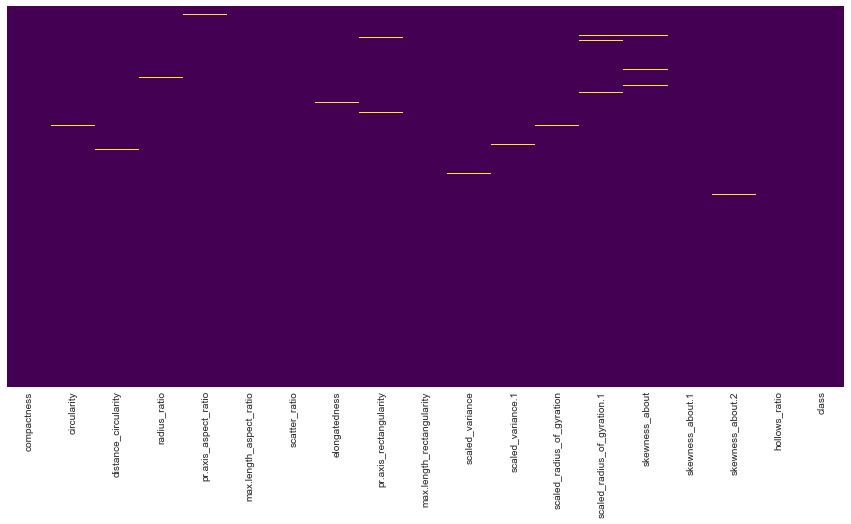

In [5]:
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
# independant variables
X = df.drop(['class'], axis=1)
# the dependent variable
Y = df[['class']]

#imputing all the missing values by mean of the columns 
X = X.apply(lambda x: x.fillna(x.mean()) , axis=0)

Target variable

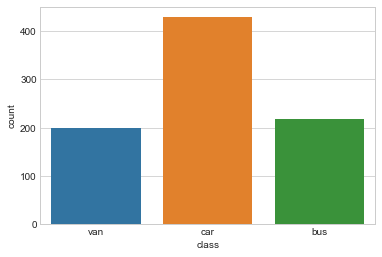

In [7]:
sns.countplot(df['class'])

There are several variables that are in co-relation with each other

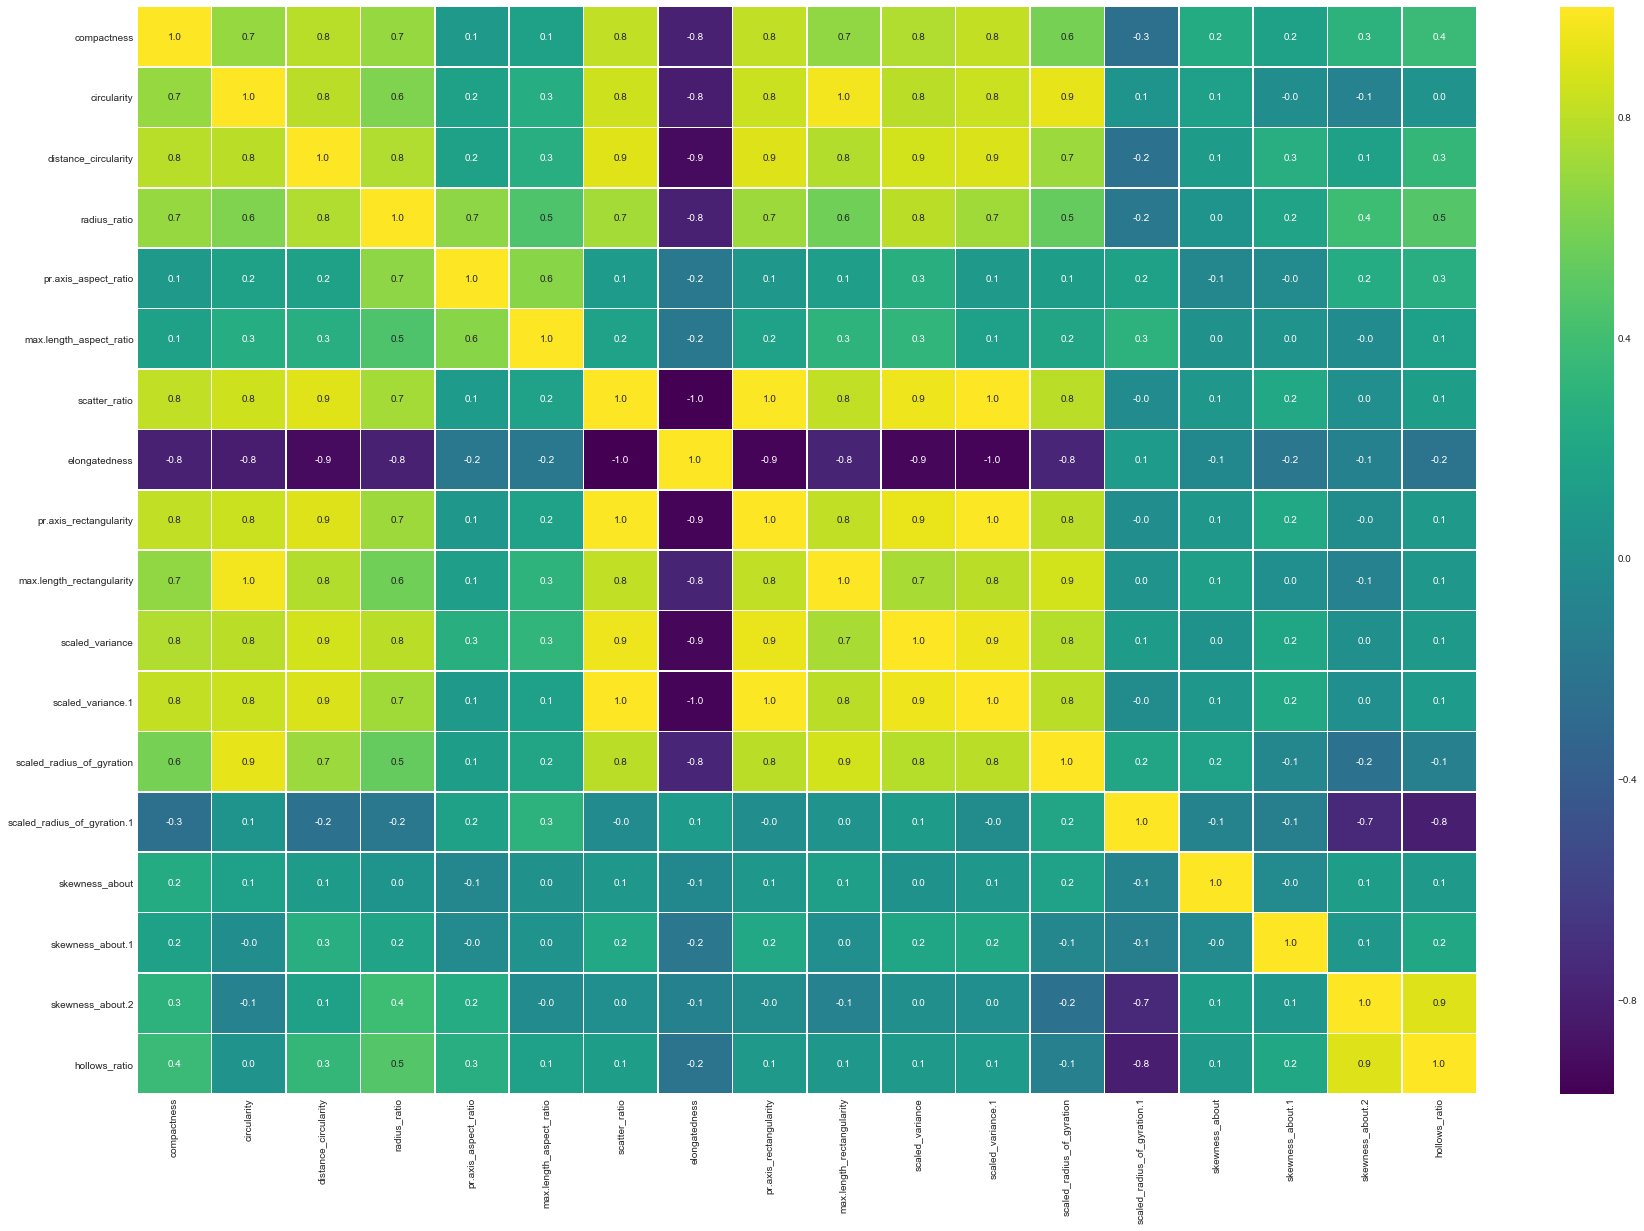

In [8]:
plt.figure(figsize=(30,20)) 
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',cmap = 'viridis')

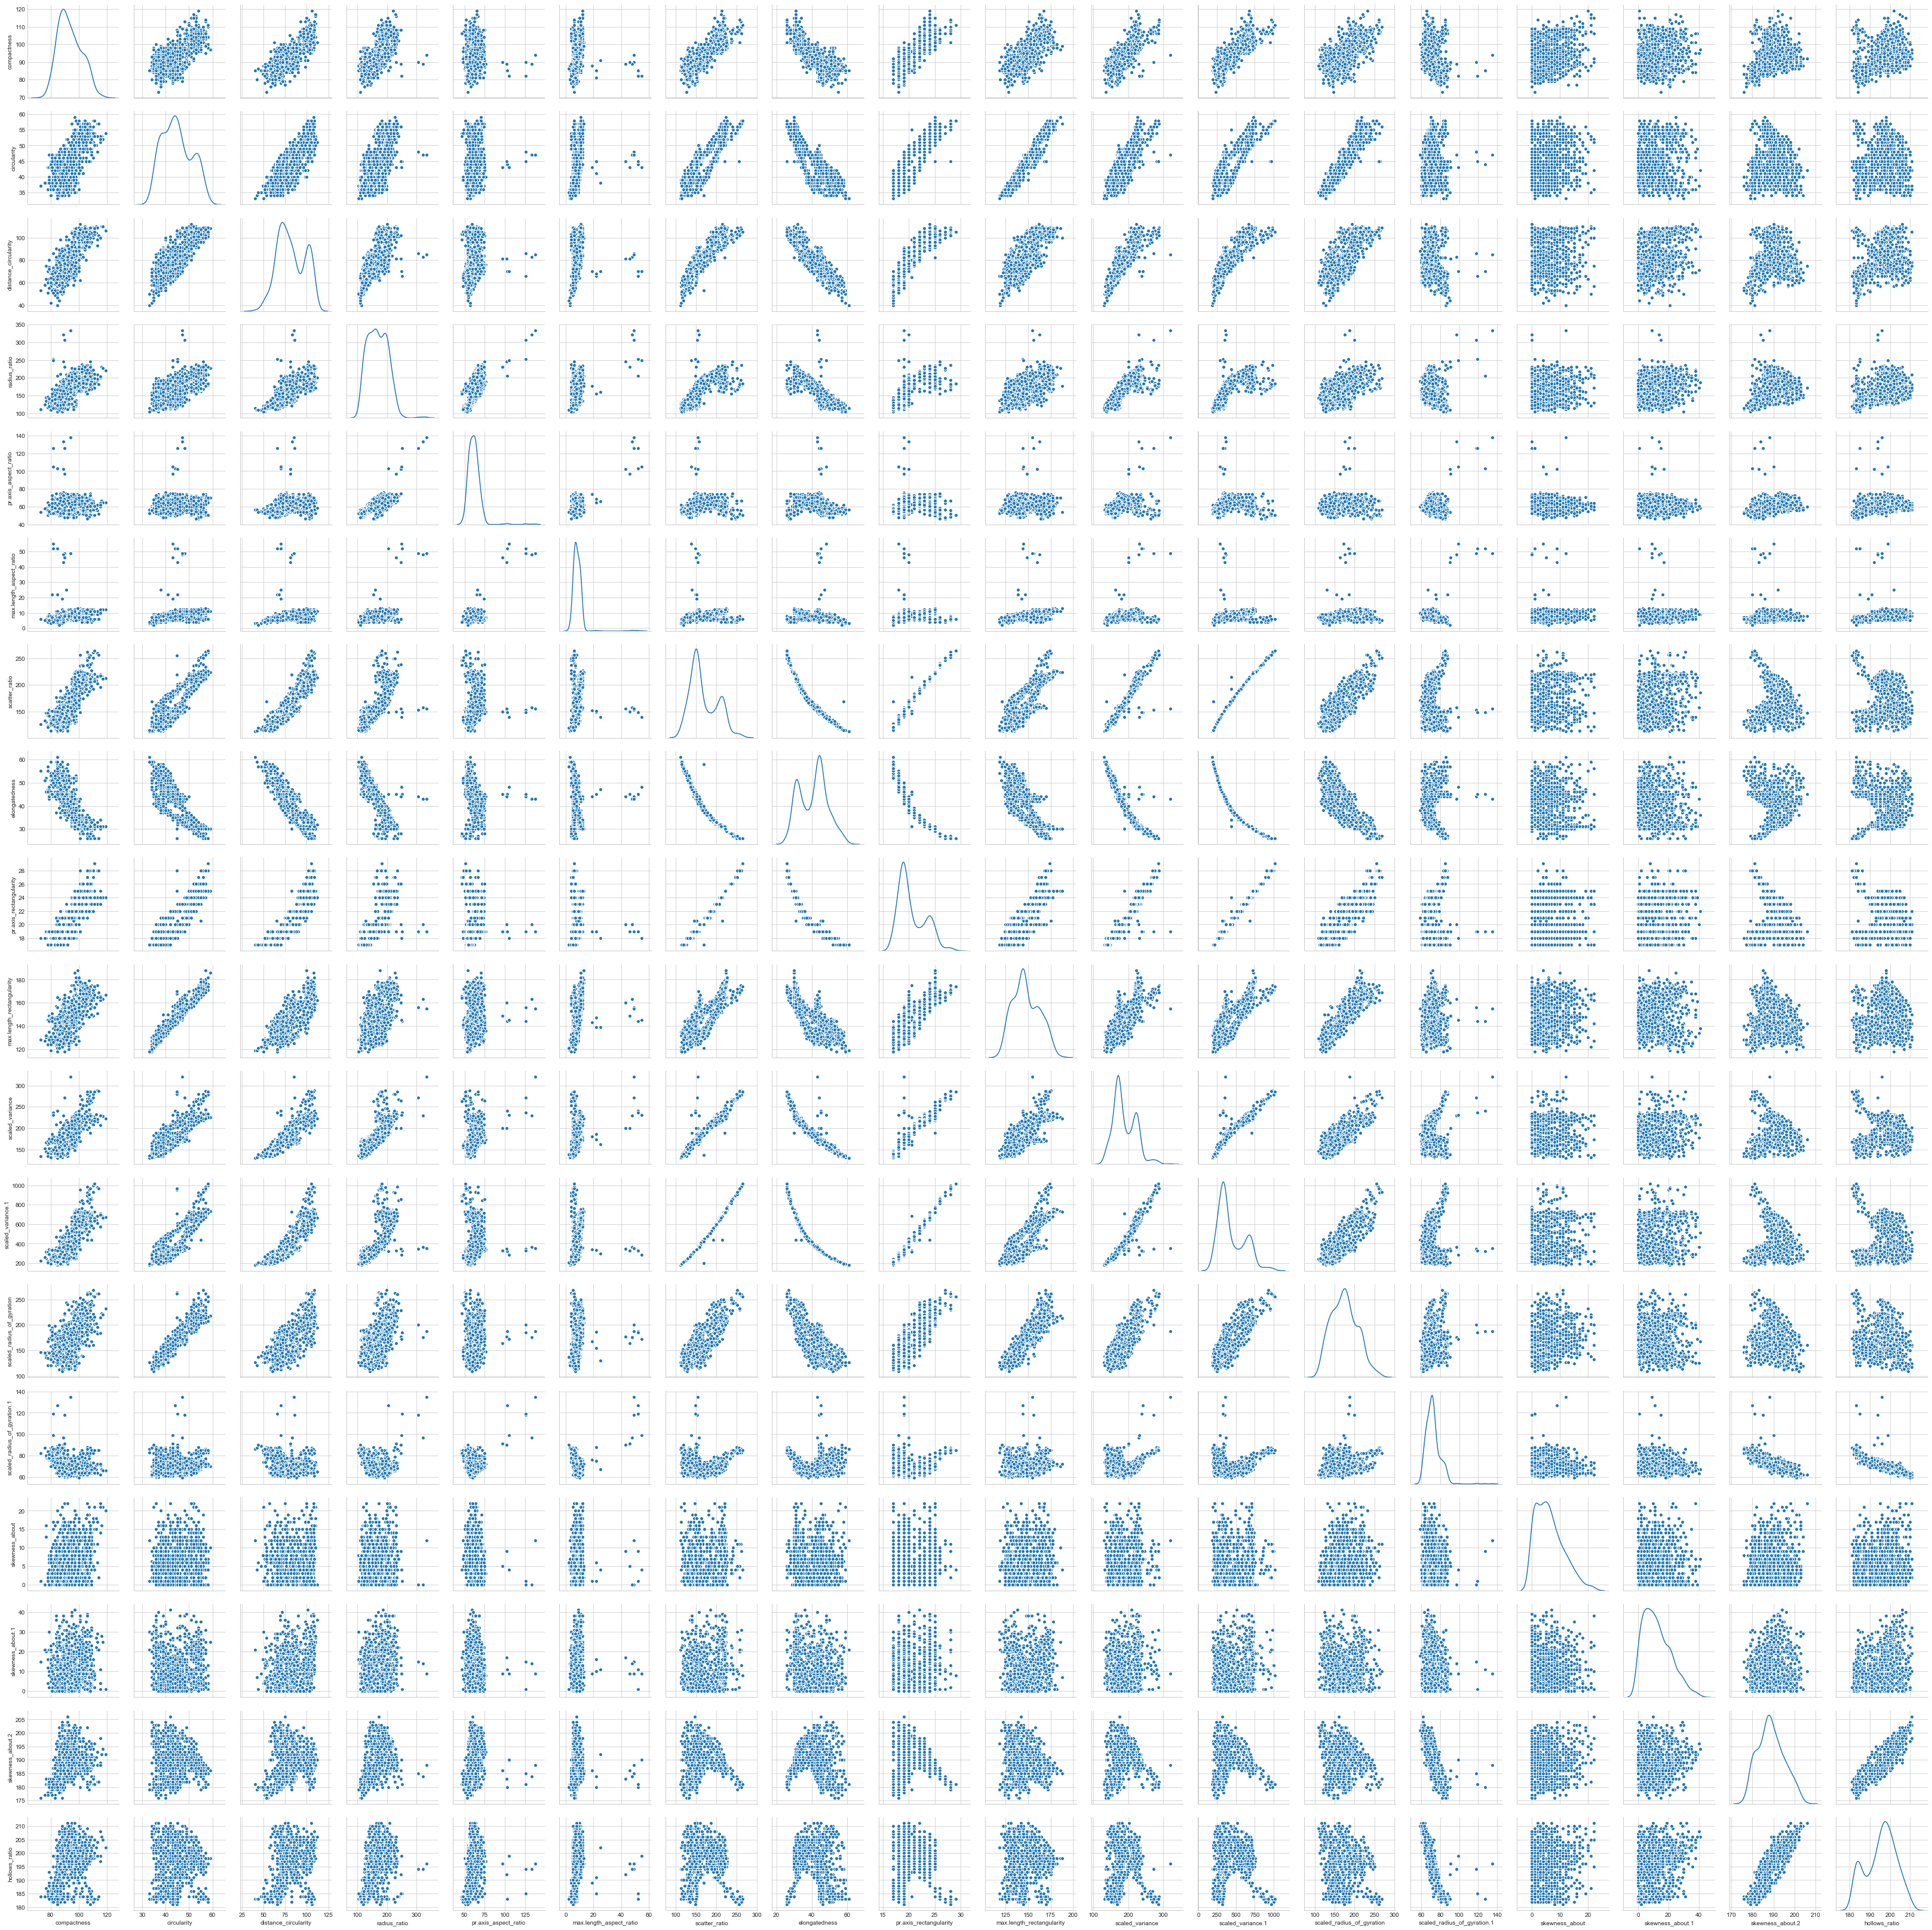

In [9]:
sns.pairplot(X, diag_kind='kde')

# Preparing data and building model

converting the output variable coulumn into numerical values 

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(Y["class"])

Y = le.transform(Y["class"])

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1,stratify = Y)

In [39]:
from sklearn.svm import SVC

model_SVM = SVC(kernel= 'linear',C= 0.1 , gamma = 1000 ,probability = True)

model_SVM.fit(x_train, y_train)

y_predict_SVM= model_SVM.predict(x_test)

In [40]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

print("Accuracy of Support Vector Machine model is {}%".format(accuracy_score(y_test, y_predict_SVM)*100))

Accuracy of Support Vector Machine model is 95.2755905511811%


Scaling the dataframe in order to apply an unsupervised algorithm

In [15]:
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.517302              0.056545      0.272965   
1    -0.325470    -0.624564              0.120112     -0.835442   
2     1.254193     0.843549              1.518571      1.201630   
3    -0.082445    -0.624564             -0.007021     -0.296217   
4    -1.054545    -0.135193             -0.769817      1.081803   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310206                 0.311542      -0.208038   
1             -0.593962                 0.094079      -0.599893   
2              0.548539                 0.311542       1.148382   
3              0.167705                 0.094079      -0.750606   
4              5.245485                 9.444962      -0.599893   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136580               -0.225160                   0.758332   
1       0.520853               -0.611739                  -0.344578   
2      -1.144331                0.934576                   0.689401   
3       0.648945               -0.611739                  -0.344578   
4       0.520853               -0.611739                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.403077          -0.343028                   0.285618   
1        -0.594546          -0.620879                  -0.513719   
2         1.096764           1.108603                   1.392391   
3        -0.913661          -0.739958                  -1.466773   
4         1.671171          -0.649231                   0.408593   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327938       -0.074340          0.380665   
1                    -0.059987        0.537873          0.156589   
2                     0.073989        1.558230         -0.403603   
3                    -1.265769       -0.074340         -0.291565   
4                     7.308682        0.537873         -0.179527   

   skewness_about.2  hollows_ratio  
0         -0.312193       0.183957  
1          0.013088       0.452977  
2         -0.149552       0.049447  
3          1.639494       1.529056  
4         -1.450677      -1.699181

Applying PCA

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=18)
pca.fit(XScaled)

PCA(n_components=18)

Variance explained by the eigen vectors

In [17]:
print(pca.explained_variance_ratio_)

[5.22064851e-01 1.67360538e-01 1.05623824e-01 6.54931979e-02
 5.08938854e-02 2.99245766e-02 1.98968125e-02 1.22999843e-02
 8.88039031e-03 5.08920430e-03 3.69424950e-03 2.55007565e-03
 1.96447421e-03 1.48211326e-03 1.13027697e-03 9.67822019e-04
 5.12369772e-04 1.71353806e-04]


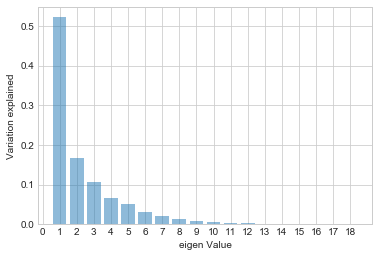

In [18]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.xticks(np.arange(1,20,1))
plt.show()

first 7 vectors can explain 95%of the variance

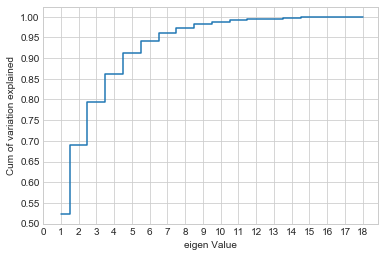

In [19]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.yticks(np.arange(0.5,1.05,0.05))
plt.xticks(np.arange(1,20,1))
plt.show()


# Dimensionality Reduction

In [20]:
#fitting and transforming a pca with 7 pricipal components
pca7 = PCA(n_components=7)
pca7.fit(XScaled)

print(pca7.explained_variance_ratio_)
Xpca7 = pca7.transform(XScaled)

[0.52206485 0.16736054 0.10562382 0.0654932  0.05089389 0.02992458
 0.01989681]


In [21]:
Xpca7 = pd.DataFrame(Xpca7)
Xpca7.head()

0         1          2         3         4         5         6
0  0.332393 -0.218638   1.001286  0.177328  0.079106 -0.754814 -0.902187
1 -1.593741 -0.420549  -0.369264  0.233484  0.693397 -0.519073  0.376234
2  3.767535  0.195041   0.088237  1.203129  0.730907  0.705377 -0.032642
3 -1.740753 -2.829579   0.109176  0.377522 -0.363483 -0.487863  0.468613
4  0.555239  4.757557  11.703588  0.145068  3.257651 -0.211649  2.671191

There is not much correlation between the principal components

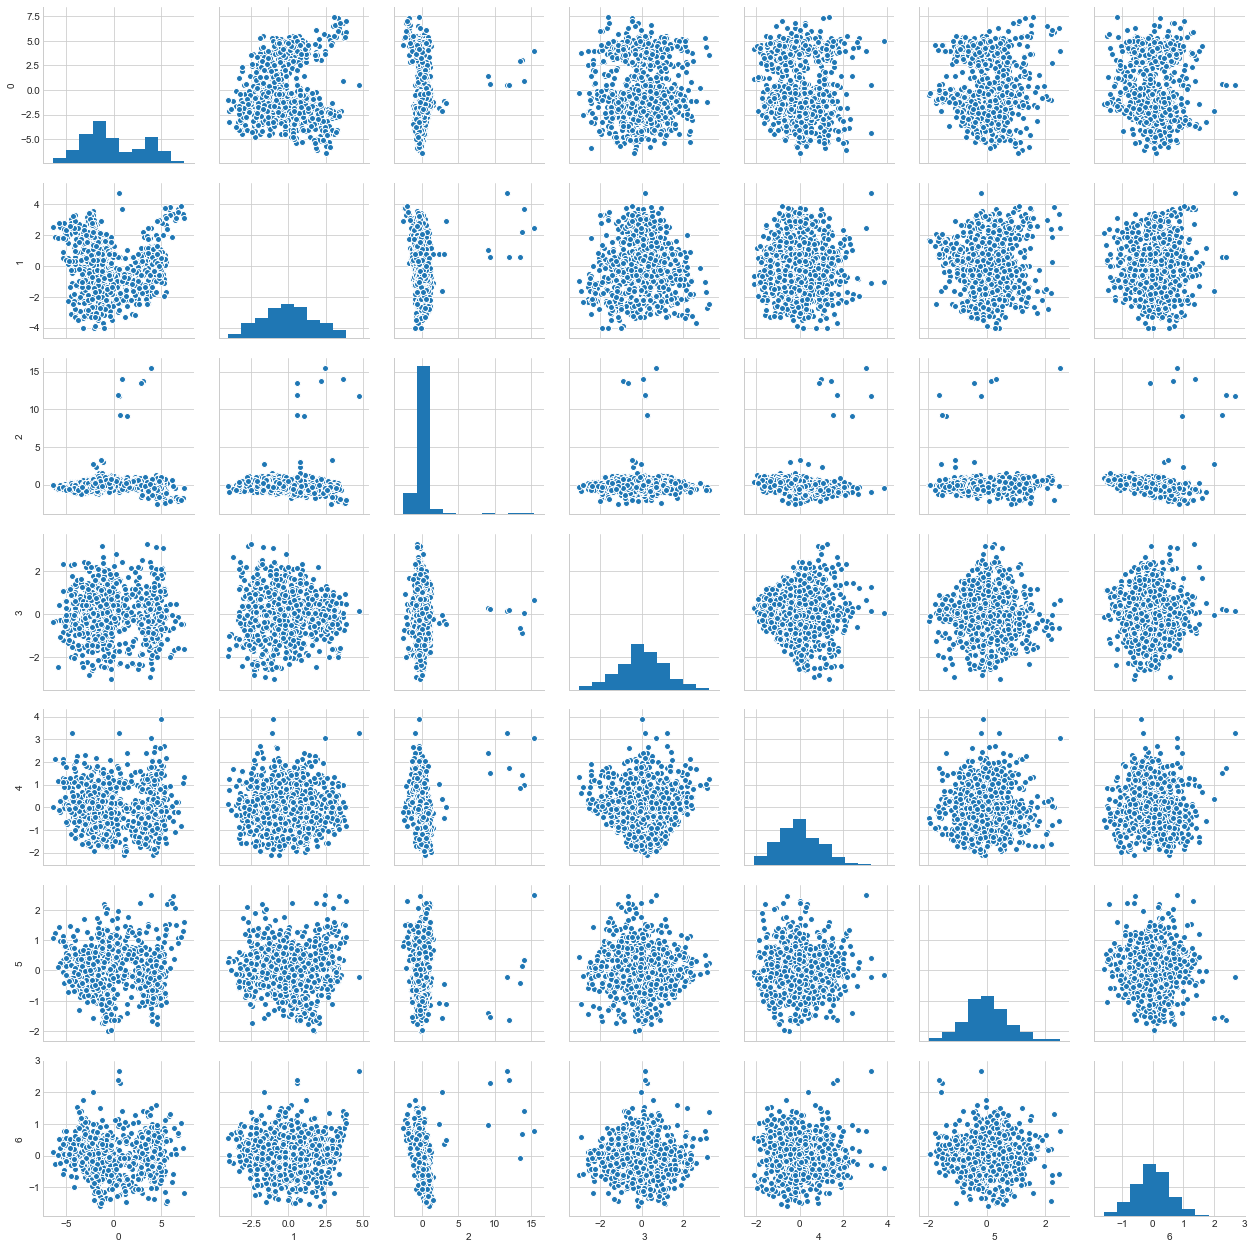

In [22]:
sns.pairplot(Xpca7)

Using SVM Model on Principal Components

In [23]:
from sklearn.model_selection import train_test_split

x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(Xpca7, Y, test_size=0.3, random_state=1,stratify = Y)

In [24]:
model_SVM_pca = SVC(kernel= 'linear',C= 0.1 , gamma = 1 ,probability = True)

model_SVM_pca.fit(x_train_pca, y_train_pca)

y_predict_SVM_pca= model_SVM_pca.predict(x_test_pca)

print("Accuracy of Support Vector Machine model with pricipal components is {}%".format(accuracy_score(y_test_pca, y_predict_SVM_pca)*100))

Accuracy of Support Vector Machine model with pricipal components is 79.52755905511812%


By using only 7 pricipal components instead of 18 the accuracy score is dropping to approximately 80% from 95%